In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import colors
import numpy as np
from datetime import date
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os, ssl
import glob
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context
    


C:\Users\c_ull\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
path=r'C://Users/c_ull/data-projects/elections-data-reforms/revamped_election_maps06222022/revamped_election_maps/'
all_files = glob.glob(path+"*_revamped.csv")
#cols=['registration_date','state_house','state_senate','us_congress','party_code']
full_revamped=[]
for file in all_files:
    usecols=['id_number','last_vote_date','dob','party_code','registration_date','voter_status','county_1']
    #usecols=['id_number','last_vote_date','dob','party_code','registration_date','voter_status','county_1',
    #        'gen_prim_2020_vote_method',"gen_prim_2020_party",'gen_elect_2020_vote_method',"gen_elect_2020_party",
    #        'muni_prim_2021_vote_method',"muni_prim_2021_party",'muni_elect_2021_vote_method',"muni_elect_2021_party",]
    df = pd.read_csv(file,usecols=usecols)
    #usecols=['id_number','first_name','last_name','middle_name','last_vote_date','dob','party_code','registration_date','voter_status','municipality','county_1',]
    #df = df[['id_number','dob','registration_date','voter_status','party_code','county_1','municipality','gen_prim_2020_vote_method',"gen_prim_2020_party",'gen_elect_2020_vote_method',"gen_elect_2020_party",
    #         'muni_prima_2021_vote_method',"muni_prim_2021_party",'muni_elect_2020_vote_method',"muni_elect_2020_party"]]
    full_revamped.append(df)
df2=pd.concat(full_revamped,sort=False)

C:\Users\c_ull\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
keys=["R",'D']
values=["R",'D']
party_dict=dict(zip(keys,values))

In [4]:
df2['party1']=df2.party_code.map(party_dict).replace(np.nan,'Other')

In [5]:
c=['Blue','Red','Yellow']

D        45.74
R        39.53
Other    14.73
Name: party1, dtype: float64


<AxesSubplot:>

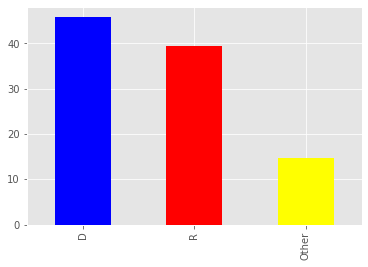

In [6]:
print(((df2['party1'].value_counts()/df2.id_number.count())*100).round(2))
((df2['party1'].value_counts()/df2.id_number.count())*100).round(2).plot(kind='bar',color=c)

In [7]:
df2['dob']=pd.to_datetime(df2.dob,errors="coerce")
df2['registration_date']=pd.to_datetime(df2.registration_date,errors="coerce")
df2['last_vote_date']=pd.to_datetime(df2.last_vote_date,errors="coerce")

In [9]:
today=date.today()

In [10]:
df2['age']=((today-df2.dob.dt.date).dt.days)/365 #- ((today.month, today.day) < (df2.dob.dt.month, df2.dob.dt.day))

In [11]:
df2

,id_number,dob,registration_date,voter_status,party_code,last_vote_date,county_1,party1,age
0,001003958-01,1932-11-20,1955-01-01,A,R,2022-05-17,ADAMS,R,89.657534
1,001010053-01,1940-10-06,1965-01-01,A,R,2022-05-17,ADAMS,R,81.775342
2,001012944-01,1944-03-21,1968-01-01,A,R,2022-05-17,ADAMS,R,78.317808
3,001015834-01,1953-05-05,1975-01-01,A,R,2022-05-17,ADAMS,R,69.189041
4,001015914-01,1951-04-14,1975-01-01,A,D,2022-05-17,ADAMS,D,71.249315
...,...,...,...,...,...,...,...,...,...
307116,112221319-67,1993-05-23,2022-06-17,A,NF,NaT,YORK,Other,29.112329
307117,112221321-67,2004-04-16,2022-06-17,A,R,NaT,YORK,R,18.205479
307118,112221330-67,1979-03-14,2022-06-17,A,D,NaT,YORK,D,43.315068
307119,112221331-67,1999-12-06,2022-06-17,A,R,NaT,YORK,R,22.569863


In [103]:
#df2['age']=df2.age.astype(str).str.replace(" days",'').str.strip().astype(float)
df2['age']=df2.age/365

In [104]:
def get_num_people_by_age_category(df):
    df2["age_group"] = pd.cut(x=df2['age'], bins=[18,25,35,45,55,65,75,100], labels=["18-24","25-34","35-44","45-54","55-64","65-74","75+"])
    return df2

In [12]:
df2['age_group']=pd.cut(x=df2['age'], bins=[18,25,35,45,55,65,75,100], labels=["18-24","25-34","35-44","45-54","55-64","65-74","75+"])

18-24     8.00
25-34    16.93
35-44    15.91
45-54    15.21
55-64    17.81
65-74    15.14
75+      10.92
Name: age_group, dtype: float64


<AxesSubplot:>

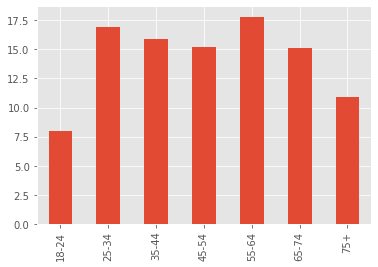

In [16]:
print(((df2['age_group'].value_counts()/df2.id_number.count())*100).round(2).sort_index())
((df2['age_group'].value_counts()/df2.id_number.count())*100).round(2).sort_index().plot(kind='bar')

25-34    310292
35-44    270123
45-54    204159
55-64    174005
18-24    144132
65-74    121340
75+       63279
Name: age_group, dtype: int64


<AxesSubplot:>

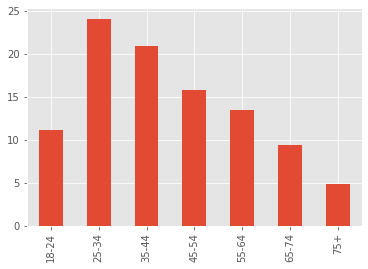

In [15]:
print(df2[df2.party1=='Other'].age_group.value_counts())
((df2[df2.party1=='Other']['age_group'].value_counts()/df2[df2.party1=='Other'].id_number.count())*100).round(2).sort_index().plot(kind='bar')

<AxesSubplot:>

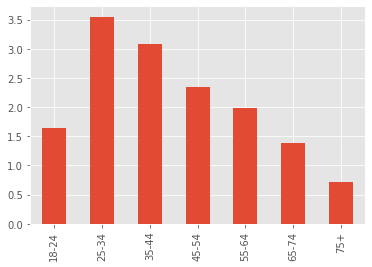

In [35]:
((df2[df2.party1=='Other']['age_group'].value_counts()/df2.id_number.count())*100).round(2).sort_index().plot(kind='bar')

18-24    21.0
25-34    21.0
35-44    19.0
45-54    15.0
55-64    11.0
65-74     9.0
75+       7.0
Name: age_group, dtype: float64


<AxesSubplot:>

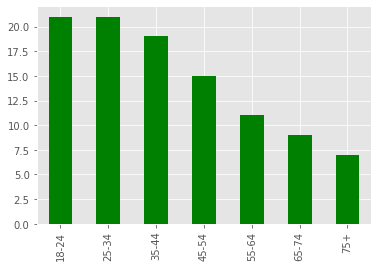

In [46]:
print(((df2[df2.party1=='Other']['age_group'].value_counts()/df2.age_group.value_counts()*100)).round().sort_index())
((df2[df2.party1=='Other']['age_group'].value_counts()/df2.age_group.value_counts()*100)).round().sort_index().plot(kind='bar',color='green')

18-24    46.0
25-34    49.0
35-44    47.0
45-54    42.0
55-64    43.0
65-74    48.0
75+      47.0
Name: age_group, dtype: float64


<AxesSubplot:>

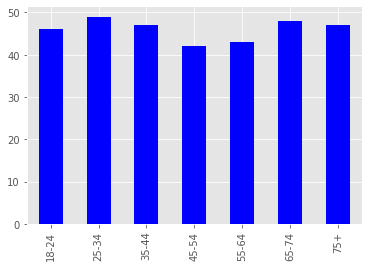

In [43]:
print(((df2[df2.party1=='D']['age_group'].value_counts()/df2.age_group.value_counts()*100)).round().sort_index())
((df2[df2.party1=='D']['age_group'].value_counts()/df2.age_group.value_counts()*100)).round().sort_index().plot(kind='bar',color='blue')

18-24    33.0
25-34    30.0
35-44    34.0
45-54    42.0
55-64    46.0
65-74    43.0
75+      47.0
Name: age_group, dtype: float64


<AxesSubplot:>

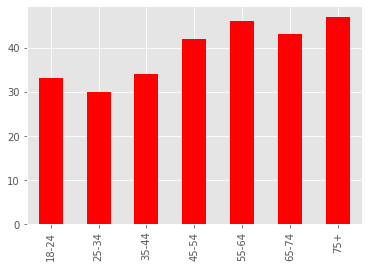

In [45]:
print(((df2[df2.party1=='R']['age_group'].value_counts()/df2.age_group.value_counts()*100)).round().sort_index())
((df2[df2.party1=='R']['age_group'].value_counts()/df2.age_group.value_counts()*100)).round().sort_index().plot(kind='bar',color='red')

In [26]:
144132/699720

0.20598525124335448